In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import os
import sklearn

In [2]:
os.chdir("/home/renaud/Dropbox/Arthur/IONIS/cours_machine_learning/Cours 2 - regression/")
df = pd.read_csv("titanic_train_clean.csv", index_col=None)      # Read the data+
# Data source : https://www.kaggle.com/c/titanic/data

In [3]:
print("Columns", df.columns)
df.drop(columns=['SibSp', 'Parch'], inplace=True)
df.head()

Columns Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Family'],
      dtype='object')


,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,7.2500,n,S,1
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,C,1
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,7.9250,n,S,0
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C,S,1
4,0,Class3,"Allen, Mr. William Henry",male,35.0,8.0500,n,S,0


In [4]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [5]:
df['Fare'].head()


0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [6]:
def is_even(x):
    return x % 2 == 0
df['is_even_Fare'] = df['Fare'].apply(lambda v: is_even(v))
df[df['is_even_Fare'] == True].shape

(78, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b6d4c2b70>]],
      dtype=object)

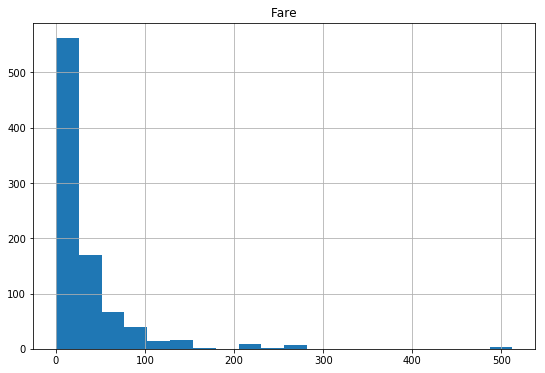

In [7]:
df.hist(column='Fare',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

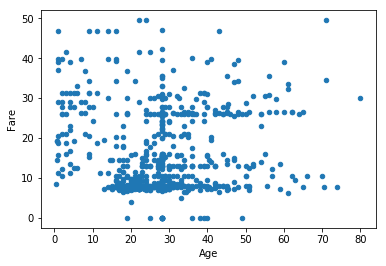

In [8]:
df[df.Fare<50].plot.scatter("Age","Fare")

In [9]:
df['Pclass'].value_counts()

Class3    491
Class1    216
Class2    184
Name: Pclass, dtype: int64

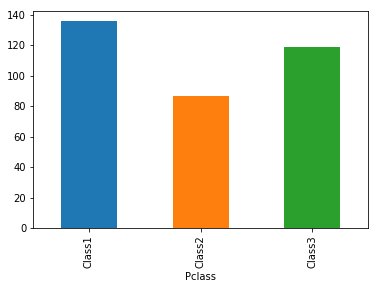

In [10]:
grouped = df.groupby(['Pclass'])['Survived']
grouped.sum().plot(kind='bar')

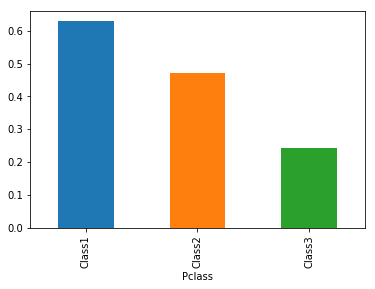

In [11]:
grouped = df.groupby(['Pclass'])['Survived']
grouped.mean().plot(kind='bar')

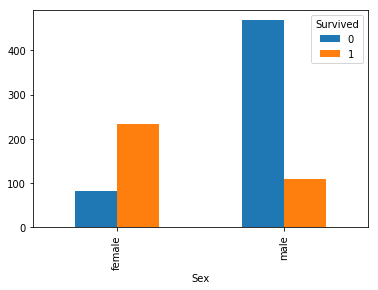

In [12]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar')

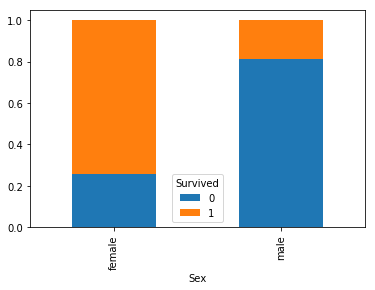

In [13]:
table=pd.crosstab(df.Sex,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [14]:
df.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family', 'is_even_Fare'],
      dtype='object')

In [15]:
cat_vars=['Pclass', 'Sex', 'Cabin', 'Embarked']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1

data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [16]:
data_final=df[to_keep]
data_final.columns.values

array(['Survived', 'Name', 'Age', 'Fare', 'Family', 'is_even_Fare',
       'Pclass_Class1', 'Pclass_Class2', 'Pclass_Class3', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_n', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'], dtype=object)

In [17]:

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X = df[['Age', 'Fare', 'Family', 'Pclass_Class1', 'Pclass_Class2', 
       'Sex_male', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_n',
       'Embarked_Q', 'Embarked_S']]
df.to_csv('base_model.csv', index=None)
y = df['Survived']
rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [18]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.438294
         Iterations: 35
                             Results: Logit
Model:                 Logit               No. Iterations:      35.0000 
Dependent Variable:    Survived            Pseudo R-squared:    0.342   
Date:                  2018-05-02 18:45    AIC:                 813.0392
No. Observations:      891                 BIC:                 889.7167
Df Model:              15                  Log-Likelihood:      -390.52 
Df Residuals:          875                 LL-Null:             -593.33 
Converged:             0.0000              Scale:               1.0000  
------------------------------------------------------------------------
               Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------
Age            -0.0319     0.0077  -4.1581 0.0000     -0.0470    -0.0169
Fare            0.0032     0.0027   1.1946 0.2323     -0.0021     0.0085
Family        

/home/renaud/.local/share/virtualenvs/datascience-f90qDZbT/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/renaud/.local/share/virtualenvs/datascience-f90qDZbT/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/renaud/.local/share/virtualenvs/datascience-f90qDZbT/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [21]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.799


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[147  21]
 [ 28  72]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       168
          1       0.77      0.72      0.75       100

avg / total       0.82      0.82      0.82       268

